In [2]:
import pandas as pd
import sys
sys.path.append('/home/mi/rrszynka/mnt/janek/Beesbook-janek/Python-modules/')
from bee_cache import Cache, CacheType, CacheFormat; c = Cache()

/usr/local/lib/python3.5/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
gaps = c.load('120_random_gaps_unmasked_unfiltered_seed_666_conf_099_classified', format=CacheFormat.csv)
print(gaps.shape)

(120, 27)


In [4]:
# Some magic way of eliminating invalid data?
gaps = gaps[gaps.origin_for_exit.isna() == False]

In [5]:
# Typo corrections
gaps.real_gap[gaps.real_gap == " FALSE"] = "FALSE"
gaps.real_gap[gaps.real_gap == ' '] = "TRUE"

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# Remove all invalid rows
gaps = gaps[gaps.disappear_reason != 'x']
gaps = gaps[gaps.disappear_reason != 'not_downloaded']
gaps = gaps[gaps.disappear_reason != 'not downloaded']

In [7]:
gaps = gaps.sample(100)

In [8]:
# gaps = gaps[['real_gap', 'possible_trip', 'disappear_reason']]

In [9]:
gaps.real_gap[gaps.real_gap.isna()] = True # default
gaps.real_gap[gaps.real_gap == "FALSE"] = False
gaps.real_gap[gaps.real_gap == "TRUE"] = True

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
gaps.possible_trip[gaps.possible_trip.isna()] = False # default
gaps.possible_trip[gaps.possible_trip == "FALSE"] = False
gaps.possible_trip[gaps.possible_trip == "TRUE"] = True

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
assert(set(gaps.real_gap.unique()).issubset([True,False]))
assert(set(gaps.possible_trip.unique()).issubset([True,False]))

In [12]:
# Correct gap reasons 
gaps.disappear_reason[gaps.disappear_reason == 'occlusion_spiderbee'] = 'occlusion_individual'
gaps.disappear_reason[gaps.disappear_reason == 'occlusion_individual '] = 'occlusion_individual'
gaps.disappear_reason[gaps.disappear_reason == 'entered_food_cell'] = 'entered_cell'
gaps.disappear_reason[gaps.disappear_reason == 'entered_corner'] = 'entered_hive_hole'
gaps.disappear_reason[gaps.disappear_reason == 'walking_small_dist'] = 'other'
gaps.disappear_reason[gaps.disappear_reason == 'light_reflex'] = 'other'
gaps.disappear_reason[gaps.disappear_reason == 'bad_vision'] = 'other'

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ip

In [14]:
gaps.disappear_reason.unique()

array(['occlusion_crowd', 'occlusion_individual', 'tag_angle', 'none',
       'entered_cell', 'flipped', 'other', 'edge_disappearance',
       'entered_hive_hole', 'fov_disappearance'], dtype=object)

In [15]:
#TODO: export and do analysis in a separate file, with 02 included

In [16]:
gaps.to_csv('gaps_099_displayble')

In [17]:
c.save(gaps, 'gaps_099_displayable')

In [18]:
import seaborn as sns

In [19]:
gaps.real_gap.value_counts()

True     88
False    12
Name: real_gap, dtype: int64

In [20]:
gaps.possible_trip.value_counts()

False    98
True      2
Name: possible_trip, dtype: int64

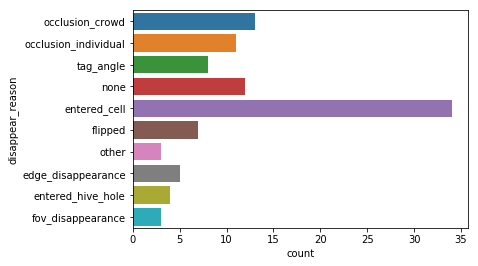

In [22]:
ax = sns.countplot(y="disappear_reason", data=gaps)